## 1 数据读入

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('lxz119-123.csv')

In [7]:
df

,ID,username,date,text
0,1,菜菜小居居,2022年01月23日 22:53,对于刘学州这件事一直作为旁观者态度，不支持也不反对，但是这个脑残的某些评论真的让人下头，见你...
1,2,FANG喜YI汕头,2022年01月23日 20:15,#刘学州##错换人生28年##孙海洋与儿子认亲现场# 五颜六色的人生，与孙家相比，刘学州认得...
2,3,成熟味影视,2022年01月23日 19:39,寻亲男孩刘学州称被生母拉黑 真的好可怜！加油，你是最棒的#娱乐综艺##明星日常# L成熟味影...
3,4,努力飞的鸟,2022年01月23日 15:08,想想刘学州还是觉得难过，明明看着那么漂亮的一个男孩子，如果好命在一个正常的家庭，该被父母亲人...
4,5,小野猫电影,2022年01月23日 10:04,寻亲男孩刘学州称被生母拉黑 真的好可怜！加油，你是最棒的#娱乐综艺##明星日常# L小野猫电...
...,...,...,...,...
284,285,vsta,2022年01月19日 05:08,寻亲男孩刘学州发文，称再遭亲生父母遗弃，疑被生母亲拉黑联系方式。 [生而为赢]#放肆趣嗨迎新...
285,286,初见余生,2022年01月19日 04:50,天啊！我泪目了！太心疼刘学州这孩子了！刘学州被自己亲生母亲拉黑！明明前几天还拉着儿子的手亲切...
286,287,化春光,2022年01月19日 03:29,#寻亲男孩刘学州望生母帮买房遭拉黑#【被网友里的圣母气笑了！刘学州不应该放弃起诉】他刚出生就...
287,288,wsn11daddy,2022年01月19日 02:30,咱就是说，希望国家能全力支持刘学州，做他坚实的后盾。让坏人得到应有的报应，承担应受的法律责任...


# 文本聚类

In [21]:
import pandas as pd
import os
def k_means(df,a): #输入路径 输出路径 需要处理数据所在的行
    
    

    texts = df[a]  # 提取需分词的内容

    import jieba.posseg as pseg

    texts1 = []
    for text in texts:
        pairs = pseg.cut(text)
        result = [[pair.word, pair.flag] for pair in pairs]
        texts1.append(result)

    # print(texts1)
    texts2 = [[word[0] for word in text if word[1] == 'n'
               or word[1] == 'v' or word[1] == 'a' or word[1] == 'd' or word[1] == 'nr'
               or word[1] == 'nrfg' or word[1] == 'ns' or word[1] == 'nt' or word[1] == 'nz'
               or word[1] == 'vn' or word[1] == 'vd' or word[1] == 'an' or word[1] == 'ad'
               or word[1] == 'l'] for text in texts1]

    texts3 = [[word for word in text if len(word) > 1] for text in texts2]


    texts5 = [' '.join(text) for text in texts3]
    df['textcut'] = texts5
    print(df)

    file = []
    for word in texts5:
        file.extend(word)
    
    from collections import defaultdict
    word_dict = defaultdict(int)  # 默认数据类型为int
    for word in file:
        word_dict[word] += 1  # word出现一次就加一次

    terms = []
    freq = []
    for item in word_dict.items():
        terms.append(item[0])
        freq.append(item[1])

    def tokench(text):
        tokens = [word for word in text.split(' ')]  # 数据以空格隔开
        after_tokens = []
        for token in tokens:
            if len(token) > 1:
                after_tokens.append(token)
        return after_tokens

    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8,
                                       max_features=200000,
                                       tokenizer=tokench,
                                       use_idf=True)

    tfidf_matrix = tfidf_vectorizer.fit_transform(df['textcut'])

    weight = tfidf_matrix.todense().tolist()  # tfidf权重

    from sklearn.cluster import KMeans

    num_clusters = 4

    km = KMeans(n_clusters=num_clusters)

    km.fit(tfidf_matrix)

    clusters = km.labels_.tolist()
    df['cluster'] = clusters
    return df

    #df.to_csv(out_path,index=None)



In [22]:
df1=k_means(df,'text')
df1.to_csv('lxz130-203kmeans.csv')

      ID      username               date  \
0      1          在永无乡  2022年02月03日 23:28   
1      2          流转迂回  2022年02月03日 23:20   
2      3     唇舌指尖滑过的欢爽  2022年02月03日 23:19   
3      4      今天的星星比较亮  2022年02月03日 23:02   
4      5       墨筱沫1117  2022年02月03日 23:00   
..   ...           ...                ...   
712  713      这世界不配你的好  2022年01月30日 00:08   
713  714  只喜欢买漂亮衣服的懒灵魂  2022年01月30日 00:02   
714  715        _耶耶耶椰汁  2022年01月30日 00:02   
715  716           研芷a  2022年01月30日 00:01   
716  717          欧阳元恺  2022年01月30日 00:00   

                                                  text  \
0     大晚上看刘学州看哭了，还有心思去照镜子自恋一下（类似脸通红鼻子通红的楚楚可怜），自恋死我算了 ​   
1                                      #刘学州# 2保定·曲阳县 ​   
2    我发表了头条文章:《我试着去读懂15岁寻亲男孩刘学州的心声》 O我试着去读懂15岁寻亲男孩刘...   
3    我总在想，那么缺人，想尽一切办法让人生孩子，却不珍惜他们。刘学州，刘玉琨，还有那个栓在地下室...   
4    #徐州丰县生育八孩女子##徐州丰县生育八孩女子#22年了，新春佳节的我们不止恐婚恐育，还要防...   
..                                                 ...   
712  #刘学州#州州小朋友，七天了，你已经走了七天了，我仿佛还像在做梦一样，这个梦好长好痛，我多希..

C:\Users\Win10\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Win10\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df1.

## 2 分词

In [8]:
texts = df['text']#提取需分词的内容

In [9]:
#按词性分词
import jieba.posseg as pseg
texts1 = []
for text in texts:
    pairs = pseg.cut(text)
    result = [[pair.word, pair.flag] for pair in pairs]
    texts1.append(result)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Win10\AppData\Local\Temp\jieba.cache
Loading model cost 1.031 seconds.
Prefix dict has been built successfully.


In [10]:
texts1

[[['对于', 'p'],
  ['刘学州', 'nr'],
  ['这件', 'mq'],
  ['事', 'n'],
  ['一直', 'd'],
  ['作为', 'v'],
  ['旁观者', 'n'],
  ['态度', 'n'],
  ['，', 'x'],
  ['不', 'd'],
  ['支持', 'v'],
  ['也', 'd'],
  ['不', 'd'],
  ['反对', 'd'],
  ['，', 'x'],
  ['但是', 'c'],
  ['这个', 'r'],
  ['脑', 'n'],
  ['残', 'a'],
  ['的', 'uj'],
  ['某些', 'r'],
  ['评论', 'n'],
  ['真的', 'd'],
  ['让', 'v'],
  ['人', 'n'],
  ['下头', 'v'],
  ['，', 'x'],
  ['见', 'v'],
  ['你', 'r'],
  ['一次', 'm'],
  ['骂', 'v'],
  ['你', 'r'],
  ['一次', 'm'],
  ['，', 'x'],
  ['脑', 'n'],
  ['残母', 'n'],
  ['零', 'vn'],
  [' ', 'x'],
  ['\u200b', 'x']],
 [['#', 'x'],
  ['刘学州', 'nr'],
  ['##', 'x'],
  ['错换', 'v'],
  ['人生', 'n'],
  ['28', 'm'],
  ['年', 'm'],
  ['##', 'x'],
  ['孙', 'nr'],
  ['海洋', 'ns'],
  ['与', 'p'],
  ['儿子', 'n'],
  ['认亲', 'v'],
  ['现场', 'n'],
  ['#', 'x'],
  [' ', 'x'],
  ['五颜六色', 'i'],
  ['的', 'uj'],
  ['人生', 'n'],
  ['，', 'x'],
  ['与', 'p'],
  ['孙家', 'nrfg'],
  ['相比', 'v'],
  ['，', 'x'],
  ['刘学州', 'nr'],
  ['认得', 'v'],
  ['的', 'uj'],
  ['父母', 'n'],
  

In [12]:
#按词性抽取
texts2=[[word[0] for word in text if word[1]=='n' 
         or word[1]=='v' or word[1]=='a' or word[1]=='d' or word[1]=='nr' 
         or word[1]=='nrfg' or word[1]=='ns' or word[1]=='nt' or word[1]=='nz' 
         or word[1]=='vn' or word[1]=='vd' or word[1]=='an' or word[1]=='ad' 
         or word[1]=='l'] for text in texts1]

In [13]:
texts2

[['刘学州',
  '事',
  '一直',
  '作为',
  '旁观者',
  '态度',
  '不',
  '支持',
  '也',
  '不',
  '反对',
  '脑',
  '残',
  '评论',
  '真的',
  '让',
  '人',
  '下头',
  '见',
  '骂',
  '脑',
  '残母',
  '零'],
 ['刘学州',
  '错换',
  '人生',
  '孙',
  '海洋',
  '儿子',
  '认亲',
  '现场',
  '人生',
  '孙家',
  '相比',
  '刘学州',
  '认得',
  '父母',
  '又',
  '是',
  '竟要',
  '让',
  '仍',
  '继续',
  '领',
  '孤儿',
  '扶助金',
  '上学',
  '母将',
  '说',
  '不想',
  '让',
  '影响',
  '生活',
  '还',
  '后悔',
  '找到',
  '有钱',
  '收养',
  '人家',
  '还',
  '不止',
  '真该',
  '告',
  '汕头'],
 ['寻亲',
  '男孩',
  '刘学州',
  '称',
  '生母',
  '真的',
  '好',
  '可怜',
  '加油',
  '是',
  '最',
  '棒',
  '娱乐',
  '综艺',
  '明星',
  '日常',
  '成熟',
  '味',
  '影视',
  '微博',
  '视频'],
 ['想想',
  '刘学州',
  '觉得',
  '难过',
  '看着',
  '漂亮',
  '男孩子',
  '好',
  '命',
  '正常',
  '家庭',
  '父母亲',
  '人',
  '宠爱',
  '自信',
  '开朗',
  '有没有',
  '提',
  '过分',
  '要求',
  '外人',
  '都',
  '没有',
  '资格',
  '骂',
  '情感',
  '物质',
  '亲生父母',
  '都',
  '欠',
  '才',
  '满腔',
  '心寒',
  '失望',
  '情绪化',
  '表达',
  '都',
  '太',
  '痛苦',
  '翅',
  '展开'],
 ['寻亲',
  '男孩',


In [14]:
#删除一个字的词
texts3 =[[word for word in text if len(word)>1]for text in texts2]

In [15]:
stopwords = ["刘学州","展开","全文"]

In [16]:
texts4 =[[word for word in text if word not in stopwords]for text in texts3]

In [13]:
texts4

[['还有', '心思', '照镜子', '自恋', '类似', '鼻子', '楚楚可怜', '自恋', '算了'],
 ['保定', '曲阳县'],
 ['发表', '头条', '文章', '读懂', '寻亲', '男孩', '心声', '读懂', '寻亲', '男孩', '心声'],
 ['总在',
  '想尽',
  '一切办法',
  '人生',
  '孩子',
  '珍惜',
  '刘玉琨',
  '还有',
  '地下室',
  '上海',
  '男孩',
  '过分',
  '甚至',
  '男孩子',
  '想想',
  '廉价',
  '劳动力',
  '社畜',
  '社畜',
  '真的',
  '畜生'],
 ['徐州',
  '丰县',
  '生育',
  '女子',
  '徐州',
  '丰县',
  '生育',
  '女子',
  '新春佳节',
  '不止',
  '恐婚',
  '恐育',
  '网络',
  '暴力',
  '人渣',
  '父母',
  '没人管',
  '徐州',
  '丰县',
  '八孩',
  '母亲',
  '没人管',
  '课本',
  '人民',
  '人民',
  '服务',
  '世界',
  '角落',
  '阴暗',
  '事件',
  '发生',
  '时候',
  '有钱',
  '能力',
  '出来',
  '发声',
  '没有'],
 ['孩子', '新年快乐'],
 ['熟悉', '再也', '看不见', '身影', '三亚', '阿椰伯清', '补凉', '胜利', '豪店', '用户', '微博', '视频'],
 ['亲妈',
  '吵架',
  '自私',
  '知道',
  '自私',
  '女孩',
  '扔掉',
  '从小到大',
  '从未',
  '父母',
  '职业',
  '好像',
  '就是',
  '一直',
  '隐忍',
  '终究',
  '憋住',
  '蜡笔',
  '小球',
  '微博',
  '视频'],
 ['墨茶',
  '新年快乐',
  '墨茶',
  '草莓',
  '应该',
  '收到',
  '好吃',
  '草莓',
  '不用',
  '花钱',
  '还有',
  '饺子',
  '算是',
  '老乡',

In [61]:
#以空格分割
texts5 = [' '.join(text)for text in texts4]
df['textcut'] = texts5

In [62]:
texts5

['还有 心思 照镜子 自恋 类似 鼻子 楚楚可怜 自恋 算了',
 '保定 曲阳县',
 '发表 头条 文章 读懂 寻亲 男孩 心声 读懂 寻亲 男孩 心声',
 '总在 想尽 一切办法 人生 孩子 珍惜 刘玉琨 还有 地下室 上海 男孩 过分 甚至 男孩子 想想 廉价 劳动力 社畜 社畜 真的 畜生',
 '徐州 丰县 生育 女子 徐州 丰县 生育 女子 新春佳节 不止 恐婚 恐育 网络 暴力 人渣 父母 没人管 徐州 丰县 八孩 母亲 没人管 课本 人民 人民 服务 世界 角落 阴暗 事件 发生 时候 有钱 能力 出来 发声 没有',
 '孩子 新年快乐',
 '熟悉 再也 看不见 身影 三亚 阿椰伯清 补凉 胜利 豪店 用户 微博 视频',
 '亲妈 吵架 自私 知道 自私 女孩 扔掉 从小到大 从未 父母 职业 好像 就是 一直 隐忍 终究 憋住 蜡笔 小球 微博 视频',
 '墨茶 新年快乐 墨茶 草莓 应该 收到 好吃 草莓 不用 花钱 还有 饺子 算是 老乡 老乡 新年快乐',
 '可惜 痛心 樱花 影视 微博 视频',
 '积极向上 孩子',
 '开端 感想 觉得 陶映红 精神病人 负责 母亲 较真 真相 社会舆论 坚持 追求 坚信 真相 警方 调查 得到 真相 无法 释怀 活着 痛苦 网络 暴力 可恶 匿名 言论 不用 负责 网络 暴力 害死',
 '就是 时候 网暴 呜呜 好惨 转眼 网暴 觉得 真他妈',
 '姐姐 蛋糕 祝福 送给 得偿 万事 胜意',
 '李医生 评论 新年快乐 感到 难过 原来 时间 真的 觉得 恍惚',
 '亲生父母 涉嫌 遗弃罪 希望 弟弟 遇到 暖意 加害 得到 应有 惩罚',
 '分享 单曲 大海 网易 音乐 新年快乐 天冷加',
 '求求 大家 忘记',
 '天宇 发声 有着 相同 经历 更加 感同身受 橘猫 娱乐 微博 视频',
 '舅妈 委托 律师 维权 律师 发文 正义 也许 迟到 绝不会 缺席 观摩 互联网 微博 视频',
 '难过',
 '大家 可怜 欺负 网暴 惩罚 再也 回不来 孩子 互联网 就是 爱恨 廉价 永远 热泪盈眶 永远 永远 永远',
 '鹿道森 死去 世界 突然 开始',
 '是不是 死亡 方式 才能 得到 解脱 才能 看到 事情 严重性 最怕 牺牲 没有 价值 坏人 不会 反思 邯

In [63]:
df

,ID,username,date,text,textcut
0,1,在永无乡,2022年02月03日 23:28,大晚上看刘学州看哭了，还有心思去照镜子自恋一下（类似脸通红鼻子通红的楚楚可怜），自恋死我算了 ​,还有 心思 照镜子 自恋 类似 鼻子 楚楚可怜 自恋 算了
1,2,流转迂回,2022年02月03日 23:20,#刘学州# 2保定·曲阳县 ​,保定 曲阳县
2,3,唇舌指尖滑过的欢爽,2022年02月03日 23:19,我发表了头条文章:《我试着去读懂15岁寻亲男孩刘学州的心声》 O我试着去读懂15岁寻亲男孩刘...,发表 头条 文章 读懂 寻亲 男孩 心声 读懂 寻亲 男孩 心声
3,4,今天的星星比较亮,2022年02月03日 23:02,我总在想，那么缺人，想尽一切办法让人生孩子，却不珍惜他们。刘学州，刘玉琨，还有那个栓在地下室...,总在 想尽 一切办法 人生 孩子 珍惜 刘玉琨 还有 地下室 上海 男孩 过分 甚至 男孩子...
4,5,墨筱沫1117,2022年02月03日 23:00,#徐州丰县生育八孩女子##徐州丰县生育八孩女子#22年了，新春佳节的我们不止恐婚恐育，还要防...,徐州 丰县 生育 女子 徐州 丰县 生育 女子 新春佳节 不止 恐婚 恐育 网络 暴力 人渣...
...,...,...,...,...,...
712,713,这世界不配你的好,2022年01月30日 00:08,#刘学州#州州小朋友，七天了，你已经走了七天了，我仿佛还像在做梦一样，这个梦好长好痛，我多希...,小朋友 已经 仿佛 做梦 希望 睁开眼睛 手机 姐姐 天真 是不是 好笑 还好 是不是 喜欢...
713,714,只喜欢买漂亮衣服的懒灵魂,2022年01月30日 00:02,也有传播学者在微信公众号推文《刘学州事件中的媒体和网络暴力（2022年1月25日2时17分）...,传播 学者 微信 公众 推文 事件 媒体 网络 暴力 指出 复杂 事实 呈现 始终 专业 活...
714,715,_耶耶耶椰汁,2022年01月30日 00:02,天啊这么多天了每次刷到刘学州的话题还是很难受，小孩太苦了 ​,刷到 话题 难受 小孩 太苦
715,716,研芷a,2022年01月30日 00:01,rebirth——重生@刘学州a #刘学州# ​,重生


In [16]:
df.to_csv("textcut130-203.csv",index=False)

## 3 词频

In [64]:
#合并成一个文档
file = []
for word in texts4:
    file.extend(word)

In [65]:
file

['还有',
 '心思',
 '照镜子',
 '自恋',
 '类似',
 '鼻子',
 '楚楚可怜',
 '自恋',
 '算了',
 '保定',
 '曲阳县',
 '发表',
 '头条',
 '文章',
 '读懂',
 '寻亲',
 '男孩',
 '心声',
 '读懂',
 '寻亲',
 '男孩',
 '心声',
 '总在',
 '想尽',
 '一切办法',
 '人生',
 '孩子',
 '珍惜',
 '刘玉琨',
 '还有',
 '地下室',
 '上海',
 '男孩',
 '过分',
 '甚至',
 '男孩子',
 '想想',
 '廉价',
 '劳动力',
 '社畜',
 '社畜',
 '真的',
 '畜生',
 '徐州',
 '丰县',
 '生育',
 '女子',
 '徐州',
 '丰县',
 '生育',
 '女子',
 '新春佳节',
 '不止',
 '恐婚',
 '恐育',
 '网络',
 '暴力',
 '人渣',
 '父母',
 '没人管',
 '徐州',
 '丰县',
 '八孩',
 '母亲',
 '没人管',
 '课本',
 '人民',
 '人民',
 '服务',
 '世界',
 '角落',
 '阴暗',
 '事件',
 '发生',
 '时候',
 '有钱',
 '能力',
 '出来',
 '发声',
 '没有',
 '孩子',
 '新年快乐',
 '熟悉',
 '再也',
 '看不见',
 '身影',
 '三亚',
 '阿椰伯清',
 '补凉',
 '胜利',
 '豪店',
 '用户',
 '微博',
 '视频',
 '亲妈',
 '吵架',
 '自私',
 '知道',
 '自私',
 '女孩',
 '扔掉',
 '从小到大',
 '从未',
 '父母',
 '职业',
 '好像',
 '就是',
 '一直',
 '隐忍',
 '终究',
 '憋住',
 '蜡笔',
 '小球',
 '微博',
 '视频',
 '墨茶',
 '新年快乐',
 '墨茶',
 '草莓',
 '应该',
 '收到',
 '好吃',
 '草莓',
 '不用',
 '花钱',
 '还有',
 '饺子',
 '算是',
 '老乡',
 '老乡',
 '新年快乐',
 '可惜',
 '痛心',
 '樱花',
 '影视',
 '微博',
 '视频',
 '积极向上',
 '孩子',


In [66]:
#统计频数
from collections import defaultdict
word_dict = defaultdict(int)#默认数据类型为int
for word in file:
    word_dict[word] += 1#word出现一次就加一次

In [67]:
word_dict

defaultdict(int,
            {'还有': 41,
             '心思': 1,
             '照镜子': 1,
             '自恋': 3,
             '类似': 2,
             '鼻子': 2,
             '楚楚可怜': 1,
             '算了': 1,
             '保定': 2,
             '曲阳县': 2,
             '发表': 6,
             '头条': 11,
             '文章': 16,
             '读懂': 2,
             '寻亲': 48,
             '男孩': 29,
             '心声': 2,
             '总在': 1,
             '想尽': 1,
             '一切办法': 1,
             '人生': 17,
             '孩子': 143,
             '珍惜': 2,
             '刘玉琨': 2,
             '地下室': 1,
             '上海': 5,
             '过分': 2,
             '甚至': 8,
             '男孩子': 4,
             '想想': 5,
             '廉价': 2,
             '劳动力': 1,
             '社畜': 2,
             '真的': 99,
             '畜生': 9,
             '徐州': 36,
             '丰县': 19,
             '生育': 17,
             '女子': 26,
             '新春佳节': 1,
             '不止': 1,
             '恐婚': 1,
             '恐育': 1,
            

In [68]:
word_dict.items()#分别找键和值

dict_items([('还有', 41), ('心思', 1), ('照镜子', 1), ('自恋', 3), ('类似', 2), ('鼻子', 2), ('楚楚可怜', 1), ('算了', 1), ('保定', 2), ('曲阳县', 2), ('发表', 6), ('头条', 11), ('文章', 16), ('读懂', 2), ('寻亲', 48), ('男孩', 29), ('心声', 2), ('总在', 1), ('想尽', 1), ('一切办法', 1), ('人生', 17), ('孩子', 143), ('珍惜', 2), ('刘玉琨', 2), ('地下室', 1), ('上海', 5), ('过分', 2), ('甚至', 8), ('男孩子', 4), ('想想', 5), ('廉价', 2), ('劳动力', 1), ('社畜', 2), ('真的', 99), ('畜生', 9), ('徐州', 36), ('丰县', 19), ('生育', 17), ('女子', 26), ('新春佳节', 1), ('不止', 1), ('恐婚', 1), ('恐育', 1), ('网络', 75), ('暴力', 51), ('人渣', 3), ('父母', 102), ('没人管', 2), ('八孩', 4), ('母亲', 17), ('课本', 1), ('人民', 3), ('服务', 3), ('世界', 54), ('角落', 1), ('阴暗', 1), ('事件', 95), ('发生', 22), ('时候', 45), ('有钱', 2), ('能力', 6), ('出来', 27), ('发声', 21), ('没有', 112), ('新年快乐', 46), ('熟悉', 2), ('再也', 6), ('看不见', 2), ('身影', 3), ('三亚', 18), ('阿椰伯清', 1), ('补凉', 1), ('胜利', 1), ('豪店', 1), ('用户', 12), ('微博', 80), ('视频', 113), ('亲妈', 1), ('吵架', 2), ('自私', 2), ('知道', 45), ('女孩', 7), ('扔掉', 1), ('从小到大', 1), ('从未', 2), 

In [70]:
#从字典中提取词条和词频
terms = []
freq = []
for item in word_dict.items():
    terms.append(item[0])
    freq.append(item[1])

In [71]:
wordcount = pd.DataFrame({'terms':terms,'count':freq})#写入数据框

In [24]:
wordcount

,terms,count
0,还有,41
1,心思,1
2,照镜子,1
3,自恋,3
4,类似,2
...,...,...
3616,交给,1
3617,炮制,1
3618,狭隘,1
3619,偏见,1


In [72]:
wordcount1 = wordcount.sort_values(by='count',ascending=False)#按词频降序排列

In [73]:
wordcount1

,terms,count
21,孩子,143
154,希望,117
76,视频,113
63,没有,112
46,父母,102
...,...,...
1778,刨坑,1
1779,要葬,1
1780,立即,1
1782,负责人,1


In [74]:
wordcount1[:300].to_csv('lxz130-203allWordsCount.csv')

['孩子', '希望', '视频', '没有', '父母', '真的', '事件', '网暴', '微博', '网络', '看到', '亲生父母', '世界', '就是', '事情', '暴力', '京报', '寻亲', '新年快乐', '知道']
[143, 117, 113, 112, 102, 99, 95, 83, 80, 75, 63, 54, 54, 53, 52, 51, 50, 48, 46, 45]


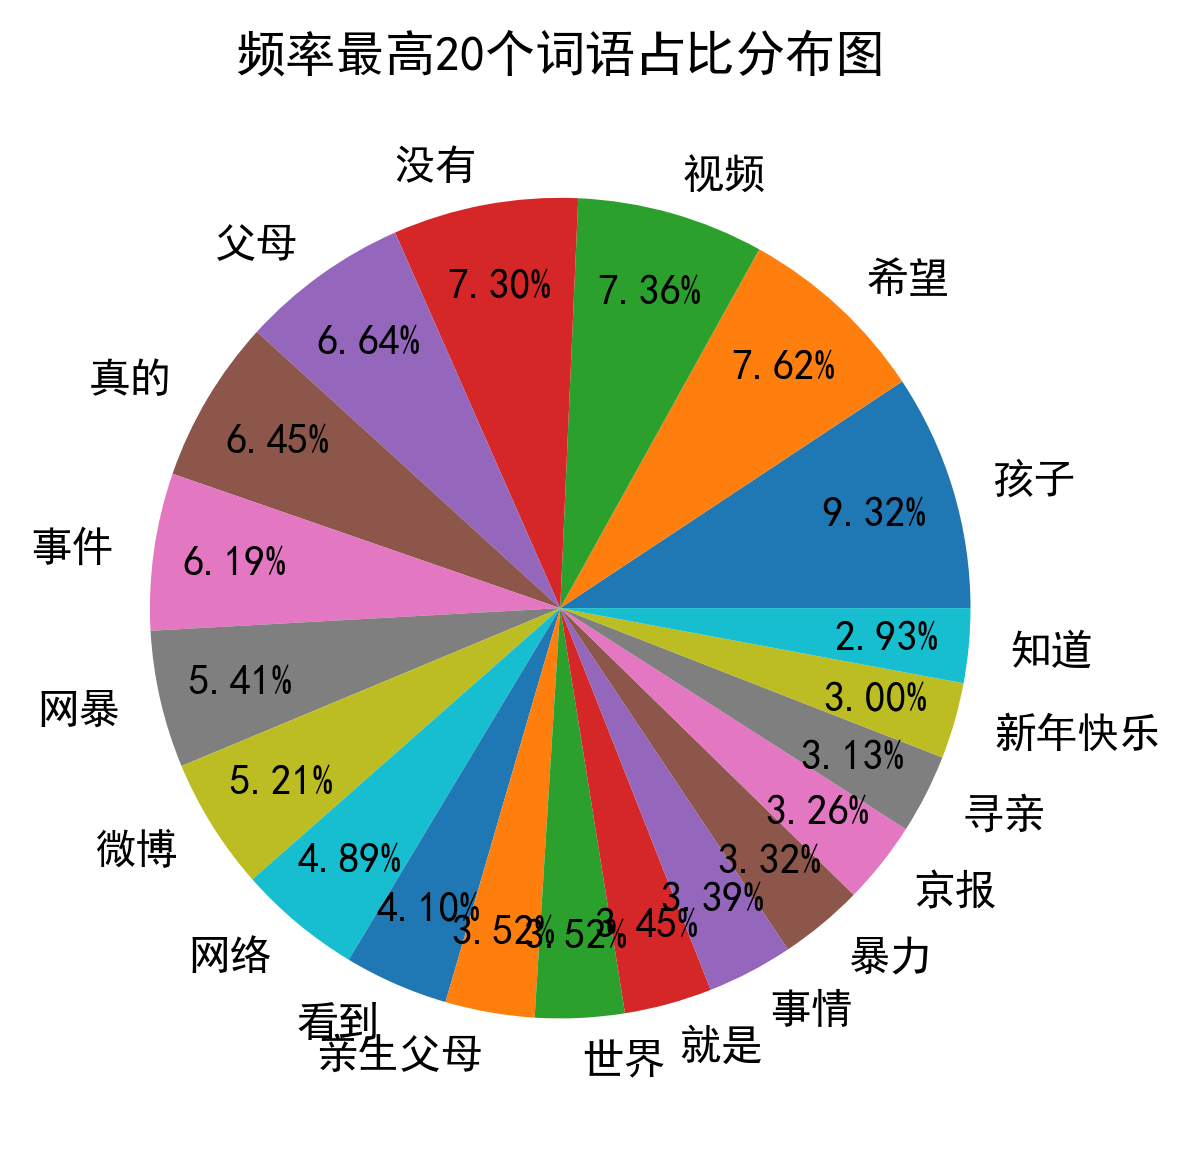

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv(r'C:\Users\Win10\Desktop\数据+代码\lxz130-203allWordsCount.csv',header=0)
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
plt.figure(dpi=300,figsize=(15,8))
x = list(data['terms'])[0:20]
y = list(data['count'])[0:20]
print(x)
print(y)
plt.subplot(133)
plt.title('频率最高20个词语占比分布图')
plt.pie(y,labels=x, autopct='%1.2f%%',pctdistance=0.8)
plt.show()

## 4 词云图

In [28]:
import wordcloud

In [29]:
a = " "
texts5 = a.join(texts5)

In [30]:
texts5

'还有 心思 照镜子 自恋 类似 鼻子 楚楚可怜 自恋 算了 保定 曲阳县 发表 头条 文章 读懂 寻亲 男孩 心声 读懂 寻亲 男孩 心声 总在 想尽 一切办法 人生 孩子 珍惜 刘玉琨 还有 地下室 上海 男孩 过分 甚至 男孩子 想想 廉价 劳动力 社畜 社畜 真的 畜生 徐州 丰县 生育 女子 徐州 丰县 生育 女子 新春佳节 不止 恐婚 恐育 网络 暴力 人渣 父母 没人管 徐州 丰县 八孩 母亲 没人管 课本 人民 人民 服务 世界 角落 阴暗 事件 发生 时候 有钱 能力 出来 发声 没有 孩子 新年快乐 熟悉 再也 看不见 身影 三亚 阿椰伯清 补凉 胜利 豪店 用户 微博 视频 亲妈 吵架 自私 知道 自私 女孩 扔掉 从小到大 从未 父母 职业 好像 就是 一直 隐忍 终究 憋住 蜡笔 小球 微博 视频 墨茶 新年快乐 墨茶 草莓 应该 收到 好吃 草莓 不用 花钱 还有 饺子 算是 老乡 老乡 新年快乐 可惜 痛心 樱花 影视 微博 视频 积极向上 孩子 开端 感想 觉得 陶映红 精神病人 负责 母亲 较真 真相 社会舆论 坚持 追求 坚信 真相 警方 调查 得到 真相 无法 释怀 活着 痛苦 网络 暴力 可恶 匿名 言论 不用 负责 网络 暴力 害死 就是 时候 网暴 呜呜 好惨 转眼 网暴 觉得 真他妈 姐姐 蛋糕 祝福 送给 得偿 万事 胜意 李医生 评论 新年快乐 感到 难过 原来 时间 真的 觉得 恍惚 亲生父母 涉嫌 遗弃罪 希望 弟弟 遇到 暖意 加害 得到 应有 惩罚 分享 单曲 大海 网易 音乐 新年快乐 天冷加 求求 大家 忘记 天宇 发声 有着 相同 经历 更加 感同身受 橘猫 娱乐 微博 视频 舅妈 委托 律师 维权 律师 发文 正义 也许 迟到 绝不会 缺席 观摩 互联网 微博 视频 难过 大家 可怜 欺负 网暴 惩罚 再也 回不来 孩子 互联网 就是 爱恨 廉价 永远 热泪盈眶 永远 永远 永远 鹿道森 死去 世界 突然 开始 是不是 死亡 方式 才能 得到 解脱 才能 看到 事情 严重性 最怕 牺牲 没有 价值 坏人 不会 反思 邯郸 河北 寻亲 男孩 医院 抢救无效 死亡 出生 彩礼 卖掉 寻亲 遗弃 心动 视频 司机 专线 微博 视频 不会 同意 好友 申请 申请 达州 宣汉县 遗书 希望 加害者 得到 惩罚 

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt#画图的包
%matplotlib inline

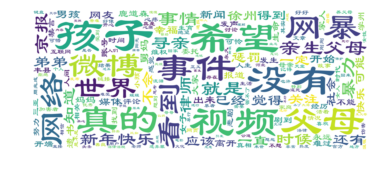

In [32]:
wordcloud = WordCloud(font_path="C:\Windows\Fonts\SIMLI.TTF",height=500,width=1200,
                      background_color='white',max_font_size=180,min_font_size=1,
                    collocations=False).generate(texts5)
plt.imshow(wordcloud, interpolation="bilinear")#双向线
plt.axis('off')#去掉坐标轴
plt.show()

## 9 主题建模

In [4]:
texts3

NameError: name 'texts3' is not defined

In [34]:
#文本准备
from gensim import corpora, models, similarities
texts = texts3

In [35]:
dictionary = corpora.Dictionary(texts) #构造词典,每个文档里每个词的词频
dictionary.filter_extremes(no_below=1, no_above=0.8)#去高频词
corpus = [dictionary.doc2bow(text) for text in texts] #构造语料库

### （1）构建模型

In [3]:
#训练一个LDA模型
%time lda = models.LdaModel(corpus, num_topics=10, id2word=dictionary, update_every=5, alpha=0.1, eta=0.1)

NameError: name 'models' is not defined

### （2）主题-词分布

In [37]:
TopicWords = lda.show_topics(num_topics=10,num_words=20)

In [38]:
topicID = []
weight = []
words = []
for word in TopicWords:
    for term in word[1].split('+'):
        topicID.append(word[0])
        weight.append(term.split('*')[0])
        words.append(term.split('*')[1])

In [39]:
TopicWordsD = pd.DataFrame({"topicID":topicID,'weight':weight,'word':words})

In [40]:
TopicWordsD

,topicID,weight,word
0,0,0.014,"""视频"""
1,0,0.010,"""微博"""
2,0,0.009,"""父母"""
3,0,0.007,"""展开"""
4,0,0.007,"""网络"""
...,...,...,...
195,9,0.004,"""不会"""
196,9,0.004,"""可能"""
197,9,0.004,"""遗体"""
198,9,0.004,"""火化"""


In [41]:
TopicWordsD.to_csv('lxz130-203主题_词分布.csv')

### （3）文档-主题分布

In [42]:
DocTopics = [ s for s in lda[corpus]]

In [43]:
DocTopics

[[(0, 0.010002046),
  (1, 0.010002538),
  (2, 0.010002134),
  (3, 0.01000259),
  (4, 0.010002286),
  (5, 0.0100036925),
  (6, 0.90997624),
  (7, 0.010002363),
  (8, 0.01000239),
  (9, 0.010003704)],
 [(0, 0.03334183),
  (1, 0.03334183),
  (2, 0.6999142),
  (3, 0.03334183),
  (4, 0.03335114),
  (5, 0.03334183),
  (6, 0.03334183),
  (7, 0.03334183),
  (8, 0.03334183),
  (9, 0.03334183)],
 [(5, 0.92498845)],
 [(0, 0.9590743)],
 [(5, 0.976914)],
 [(0, 0.033340007),
  (1, 0.03334809),
  (2, 0.033336334),
  (3, 0.033337995),
  (4, 0.033339605),
  (5, 0.033341695),
  (6, 0.69994146),
  (7, 0.03333894),
  (8, 0.03333818),
  (9, 0.033337757)],
 [(3, 0.930749)],
 [(5, 0.9590757)],
 [(1, 0.9470499)],
 [(0, 0.014290651),
  (1, 0.014290004),
  (2, 0.014289199),
  (3, 0.014290523),
  (4, 0.014291483),
  (5, 0.014290839),
  (6, 0.01429164),
  (7, 0.014291326),
  (8, 0.8713858),
  (9, 0.0142885335)],
 [(0, 0.033343256),
  (1, 0.033349708),
  (2, 0.033345442),
  (3, 0.69984096),
  (4, 0.033345178),
  (

In [44]:
DocTopics2 = []
for i in DocTopics:
    topics = [0,0,0,0,0,0,0,0,0,0]
    for j in i:
        topics[j[0]]=j[1]
    DocTopics2.append(topics)

In [45]:
DocTopics3 = pd.DataFrame(DocTopics2)

In [46]:
DocTopics3

,0,1,2,3,4,5,6,7,8,9
0,0.010002,0.010003,0.010002,0.010003,0.010002,0.010004,0.909976,0.010002,0.010002,0.010004
1,0.033342,0.033342,0.699914,0.033342,0.033351,0.033342,0.033342,0.033342,0.033342,0.033342
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.924988,0.000000,0.000000,0.000000,0.000000
3,0.959074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.976914,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.957132,0.000000,0.000000,0.000000
713,0.000000,0.976916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
714,0.016670,0.016669,0.016673,0.016672,0.016674,0.849954,0.016671,0.016670,0.016674,0.016672
715,0.050038,0.050006,0.050006,0.050006,0.050025,0.549883,0.050006,0.050006,0.050016,0.050006


In [47]:
DocTopics3.to_csv('lxz130-203文档-主题.csv')

### （4）模型可视化

In [1]:
import pyLDAvis
pyLDAvis.enable_notebook(local=True)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [2]:
import pyLDAvis.gensim

pyLDAvis.gensim.prepare(lda, corpus, dictionary)

NameError: name 'lda' is not defined

**利用百度api** 

In [45]:
import pandas as pd
from aip import AipNlp
import re
import time


def delete_sysbol(line):
    cop = re.sub('[^\u4e00-\u9fa5^]', '', line)
    return cop


# 填写百度AI分配给用户用于标识用户的三个字符串
APP_ID = '34183404'
API_KEY = 'e5HTAdIgvoNOGHLSHl9CWu4H'
SECRET_KEY = 'zFIHDZk04jZNkkkSeQsZnq2w3V8Opaab'
# 只有创建了客户端，用户才可以使用百度AI的提供的功能
baidudata = pd.read_csv(r'C:\Users\Win10\Desktop\数据+代码\lxz130-203.csv', header=0)
baidudata['积极'] = None
baidudata['消极'] = None
baidudata['置信度'] = None
client = AipNlp(APP_ID, API_KEY, SECRET_KEY)
baidudata

,ID,username,date,text,积极,消极,置信度
0,1,在永无乡,2022年02月03日 23:28,大晚上看刘学州看哭了，还有心思去照镜子自恋一下（类似脸通红鼻子通红的楚楚可怜），自恋死我算了 ​,None,None,None
1,2,流转迂回,2022年02月03日 23:20,#刘学州# 2保定·曲阳县 ​,None,None,None
2,3,唇舌指尖滑过的欢爽,2022年02月03日 23:19,我发表了头条文章:《我试着去读懂15岁寻亲男孩刘学州的心声》 O我试着去读懂15岁寻亲男孩刘...,None,None,None
3,4,今天的星星比较亮,2022年02月03日 23:02,我总在想，那么缺人，想尽一切办法让人生孩子，却不珍惜他们。刘学州，刘玉琨，还有那个栓在地下室...,None,None,None
4,5,墨筱沫1117,2022年02月03日 23:00,#徐州丰县生育八孩女子##徐州丰县生育八孩女子#22年了，新春佳节的我们不止恐婚恐育，还要防...,None,None,None
...,...,...,...,...,...,...,...
712,713,这世界不配你的好,2022年01月30日 00:08,#刘学州#州州小朋友，七天了，你已经走了七天了，我仿佛还像在做梦一样，这个梦好长好痛，我多希...,None,None,None
713,714,只喜欢买漂亮衣服的懒灵魂,2022年01月30日 00:02,也有传播学者在微信公众号推文《刘学州事件中的媒体和网络暴力（2022年1月25日2时17分）...,None,None,None
714,715,_耶耶耶椰汁,2022年01月30日 00:02,天啊这么多天了每次刷到刘学州的话题还是很难受，小孩太苦了 ​,None,None,None
715,716,研芷a,2022年01月30日 00:01,rebirth——重生@刘学州a #刘学州# ​,None,None,None


In [46]:
#定义函数 百度AI处理函数
def baiduapi(text):
    comment = delete_sysbol(text)
    result = client.sentimentClassify(comment)
    pos = result['items'][0]['positive_prob']
    neg = result['items'][0]['negative_prob']
    con = result['items'][0]['confidence']  # 置信度
    # round(pos * 100)
    # round(neg * 100)
    # round(con * 100)
    return [pos,neg,con]

    

In [48]:
for i in range(len(baidudata)): #设置处理的文本条数
    result = baiduapi(baidudata.loc[i, 'text'])
   
    baidudata.loc[i, '积极']=result[0]
    baidudata.loc[i, '消极']=result[1]
    baidudata.loc[i, '置信度']=result[2]
    time.sleep(0.5)
baidudata

,ID,username,date,text,积极,消极,置信度
0,1,在永无乡,2022年02月03日 23:28,大晚上看刘学州看哭了，还有心思去照镜子自恋一下（类似脸通红鼻子通红的楚楚可怜），自恋死我算了 ​,0.122308,0.877692,0.728204
1,2,流转迂回,2022年02月03日 23:20,#刘学州# 2保定·曲阳县 ​,0.876922,0.123078,0.726494
2,3,唇舌指尖滑过的欢爽,2022年02月03日 23:19,我发表了头条文章:《我试着去读懂15岁寻亲男孩刘学州的心声》 O我试着去读懂15岁寻亲男孩刘...,0.235614,0.764386,0.476414
3,4,今天的星星比较亮,2022年02月03日 23:02,我总在想，那么缺人，想尽一切办法让人生孩子，却不珍惜他们。刘学州，刘玉琨，还有那个栓在地下室...,0.000184,0.999816,0.999591
4,5,墨筱沫1117,2022年02月03日 23:00,#徐州丰县生育八孩女子##徐州丰县生育八孩女子#22年了，新春佳节的我们不止恐婚恐育，还要防...,0.004148,0.995852,0.990783
...,...,...,...,...,...,...,...
712,713,这世界不配你的好,2022年01月30日 00:08,#刘学州#州州小朋友，七天了，你已经走了七天了，我仿佛还像在做梦一样，这个梦好长好痛，我多希...,0.446815,0.553185,0.007078
713,714,只喜欢买漂亮衣服的懒灵魂,2022年01月30日 00:02,也有传播学者在微信公众号推文《刘学州事件中的媒体和网络暴力（2022年1月25日2时17分）...,0.017079,0.982921,0.962046
714,715,_耶耶耶椰汁,2022年01月30日 00:02,天啊这么多天了每次刷到刘学州的话题还是很难受，小孩太苦了 ​,0.04432,0.95568,0.901512
715,716,研芷a,2022年01月30日 00:01,rebirth——重生@刘学州a #刘学州# ​,0.976964,0.023036,0.948808


C:\Users\Win10\AppData\Local\Temp/ipykernel_20636/3895748177.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot([0,len(baidudata)], [mean,mean], color = 'blue',Linewidth=2,label='Sin(x)')  # 画线并添加图例legend


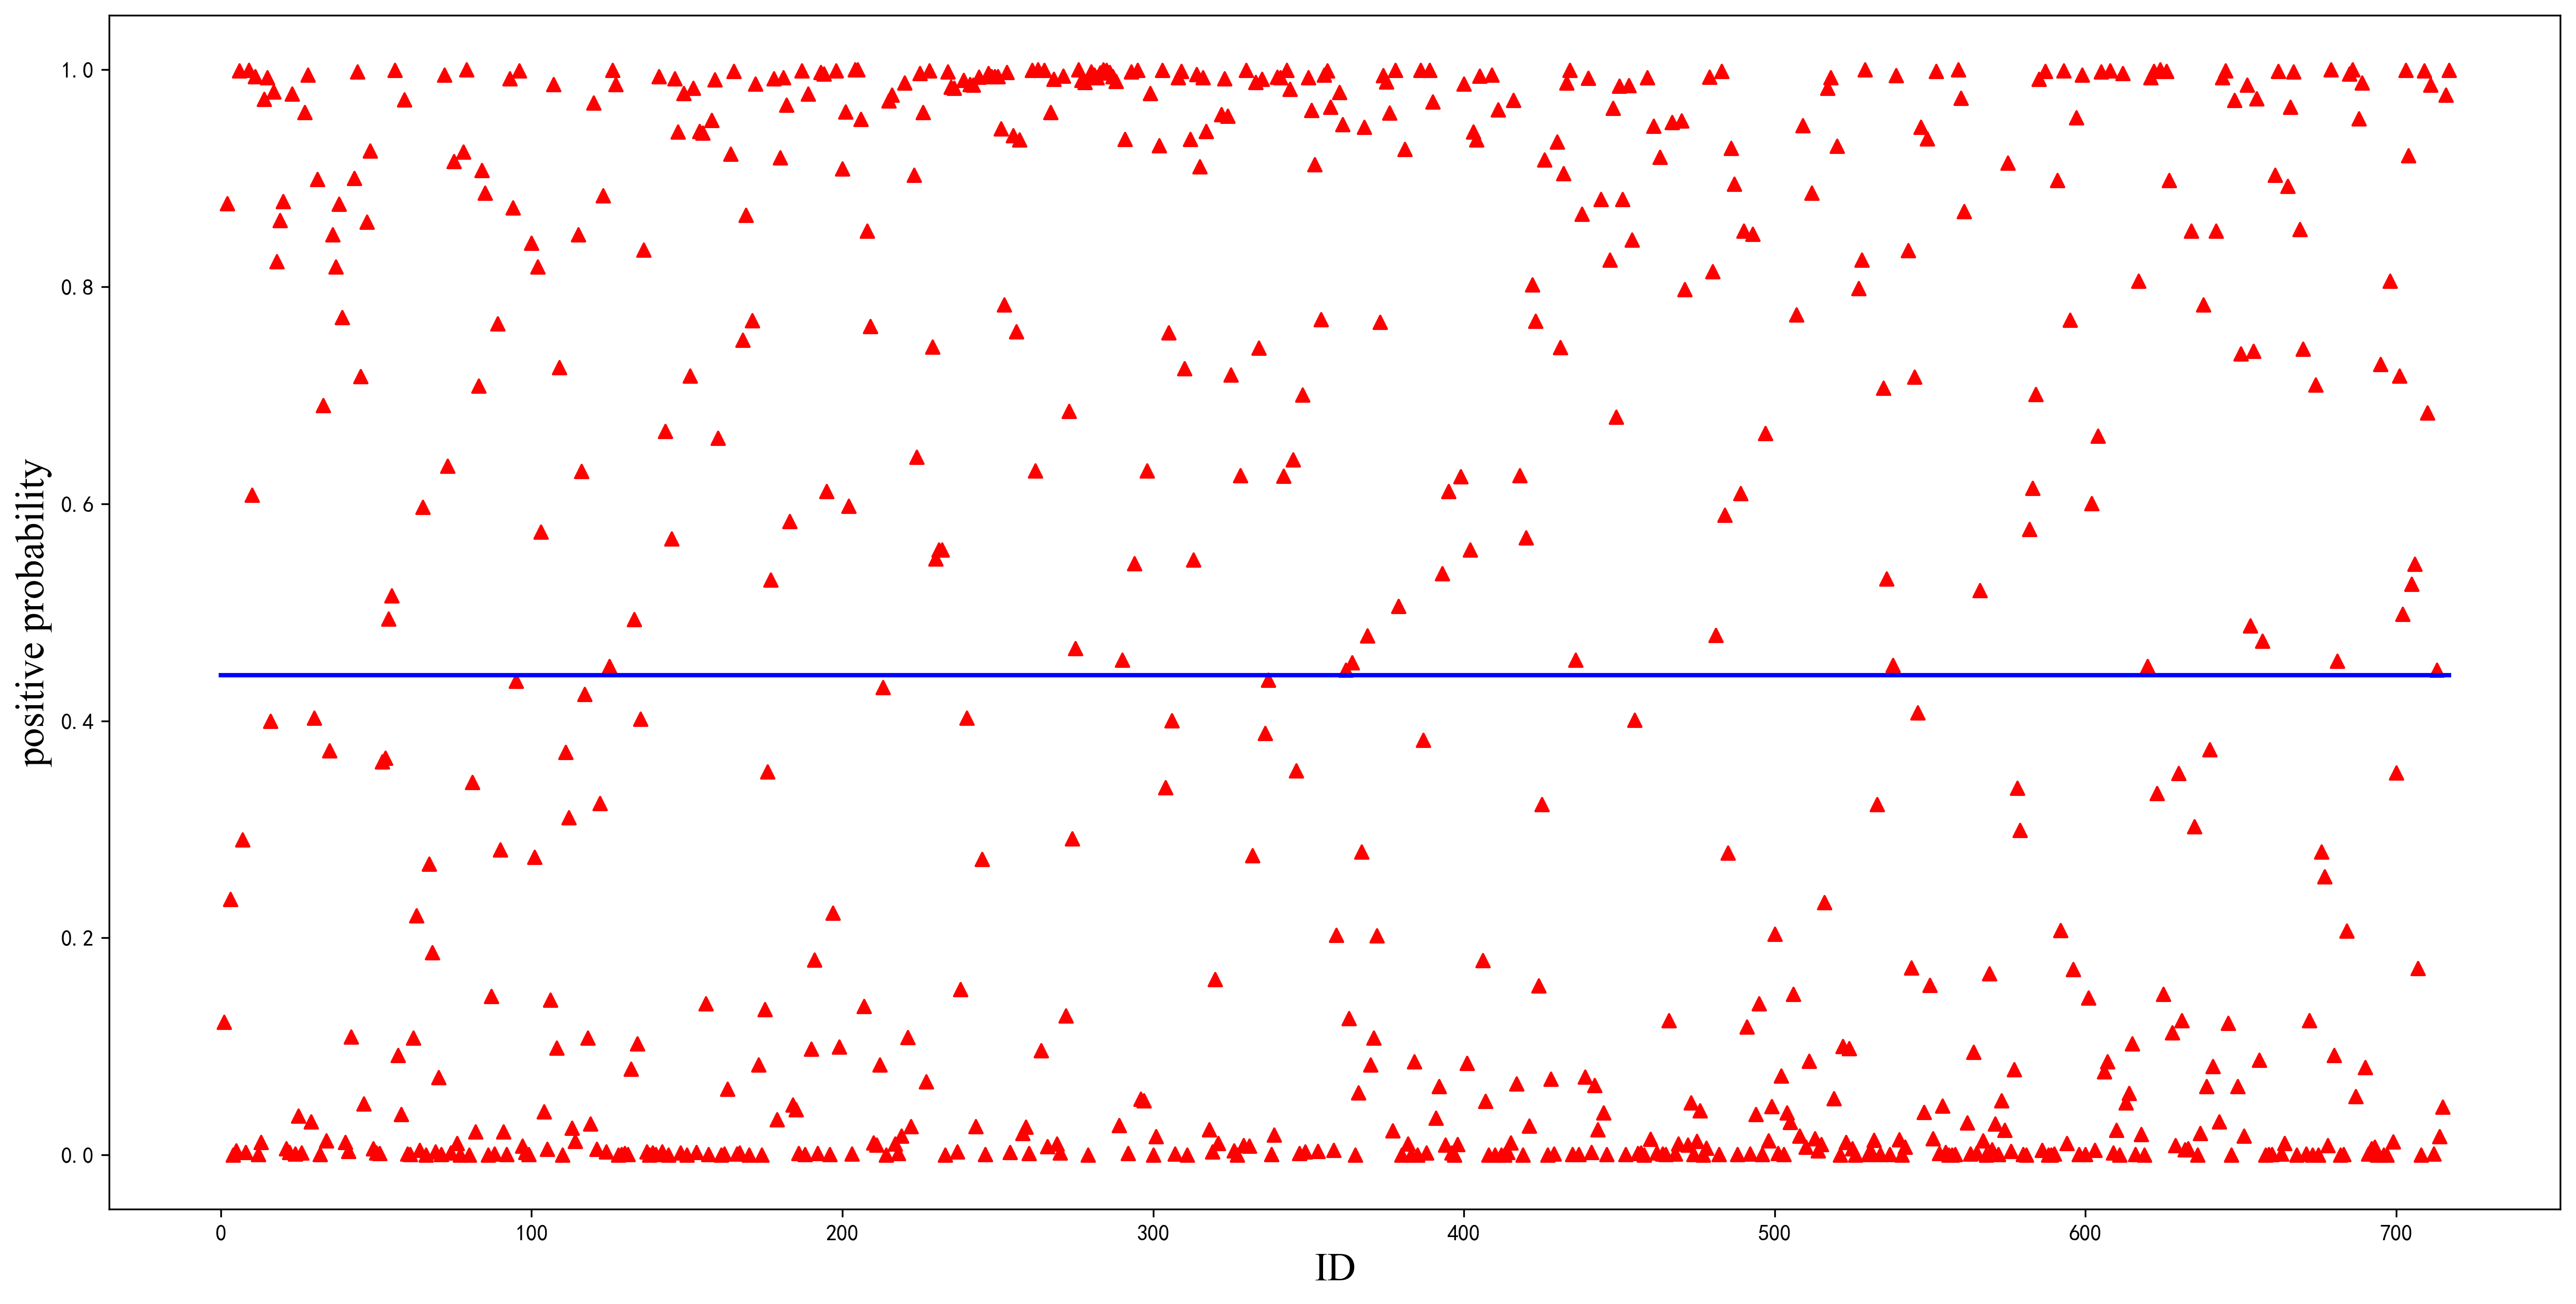

In [83]:
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
plt.figure(dpi=300,figsize=(20,10))
x = baidudata['ID']
y = baidudata['积极']

color = 'lightgreen', 'gold', 'lightskyblue', 'lightcoral', 'red'
plt.scatter(x,y,color = 'red',marker="^",label='positive')
mean=baidudata['积极'].mean()
plt.plot([0,len(baidudata)], [mean,mean], color = 'blue',Linewidth=2,label='Sin(x)')  # 画线并添加图例legend
plt.xlabel("ID", fontname="Times New Roman", fontsize=18)
plt.ylabel("positive probability", fontname="Times New Roman", fontsize=18)
plt.show()

# 文本聚类kmeans

In [37]:
import os
def k_means(df,a): #输入路径 输出路径 需要处理数据所在的行
    

    texts = df[a]  # 提取需分词的内容

    import jieba.posseg as pseg

    texts1 = []
    for text in texts:
        pairs = pseg.cut(text)
        result = [[pair.word, pair.flag] for pair in pairs]
        texts1.append(result)

    # print(texts1)
    texts2 = [[word[0] for word in text if word[1] == 'n'
               or word[1] == 'v' or word[1] == 'a' or word[1] == 'd' or word[1] == 'nr'
               or word[1] == 'nrfg' or word[1] == 'ns' or word[1] == 'nt' or word[1] == 'nz'
               or word[1] == 'vn' or word[1] == 'vd' or word[1] == 'an' or word[1] == 'ad'
               or word[1] == 'l'] for text in texts1]
    
    texts3 = [[word for word in text if len(word) > 1] for text in texts2]
  

    texts5 = [' '.join(text) for text in texts3]
    df['textcut'] = texts5
 

    file = []
    for word in texts5:
        file.extend(word)


    from collections import defaultdict
    word_dict = defaultdict(int)  # 默认数据类型为int
    for word in file:
        word_dict[word] += 1  # word出现一次就加一次

    terms = []
    freq = []
    for item in word_dict.items():
        terms.append(item[0])
        freq.append(item[1])

    def tokench(text):
        tokens = [word for word in text.split(' ')]  # 数据以空格隔开
        after_tokens = []
        for token in tokens:
            if len(token) > 1:
                after_tokens.append(token)
        return after_tokens

    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8,
                                       max_features=200000,
                                       tokenizer=tokench,
                                       use_idf=True)

    tfidf_matrix = tfidf_vectorizer.fit_transform(df['textcut'])
 
    weight = tfidf_matrix.todense().tolist()  # tfidf权重

    from sklearn.cluster import KMeans

    num_clusters = 3

    km = KMeans(n_clusters=num_clusters)

    km.fit(tfidf_matrix)

    clusters = km.labels_.tolist()
    df['cluster'] = clusters
    return df

    #df.to_csv(out_path,index=None)


 


In [38]:
df1=k_means(df,'text')
df1
df1.to_csv('刘学州2kmeans.csv')